# Model Complexity and Model Selection
## K-Nearest Neighbour (KNN) Regressor

* Implement the KNN Regressor function 
* Plot the training and the > errors versus 1/K for K=1,..,20
* Report the optimum value for K in terms of the testing error

Function knn(train.data, test.data, K=3, distance = 'euclidean'), takes training data and their labels(continuous values), the test data and size of neighbourhood(K). And, should return the regressed values for the test data points.

### Importing libraries

In [1]:
library(reshape2)
library(ggplot2)
library(corrplot)

Warning message:
"package 'reshape2' was built under R version 3.5.3"Warning message:
"package 'ggplot2' was built under R version 3.5.3"corrplot 0.84 loaded


In [2]:
# Defining KNN Regressor function

knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method = distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ###... and calculate the predicted labels according to the majority vote
        test.label[i,]<- (mean(train.label[nn,]))
    }
    
    ## return the class labels as output
    return (test.label)
}

### Importing the train and test datasets

In [3]:
train.data <- read.csv("Task1A_train.csv") # read the csv file in R dataframe 
dim(train.data) # 42 rows and 2 columns
head(train.data)

test.data <- read.csv("Task1A_test.csv")  ## read the csv file in R dataframe
dim(test.data) # 42 rows and 2 columns
head(test.data)

[1] 42  2

x1,y
<dbl>,<dbl>
1960.0,0.71
1960.5,0.85
1961.0,0.61
1961.5,0.92
1962.0,0.72
1962.5,0.92


[1] 42  2

x1,y
<dbl>,<dbl>
1960.25,0.63
1960.75,0.44
1961.25,0.69
1961.75,0.55
1962.25,0.77
1962.75,0.60


In [4]:
# from the data frame let's seperate the data & label from both train and test dataset.
train.label <- train.data[2]
train.data <- train.data[1]
test.label <- test.data[2]
test.data <- test.data[1]

In [5]:
# let see what is the prediciton of our knn for test samples when K=3
head(knn(train.data, train.label,test.data, K=3)) # let's review how our output looks given k=6

y
<dbl>
0.7233333
0.7233333
0.7933333
0.7500000
0.8533333
0.8233333


### Calculating the Test Errors
> ##### We will be using  mean square error.

In [6]:
# calculate the train and test missclassification rates for K in 1:20
# THIS MAY TAKE A FEW MINUTES TO COMPLETE!
error <- data.frame('K'=1:20, 'train'=rep(0,20), 'test'=rep(0,20))
for (k in 1:20){
    error[k,'train'] <- sum((knn(train.data, train.label, train.data, K=k) - train.label) ^ 2)/nrow(train.data)
    error[k,'test'] <-  sum((knn(train.data, train.label, test.data, K=k)  - test.label)^2)/nrow(test.data)
}
optimum_K <- which(error[,3]==min(error[,3]))
optimum_K # optimum value of K that gives minimum test error

[1] 11

### Plot the training and the testing errors versus 1/K for K=1,..,20

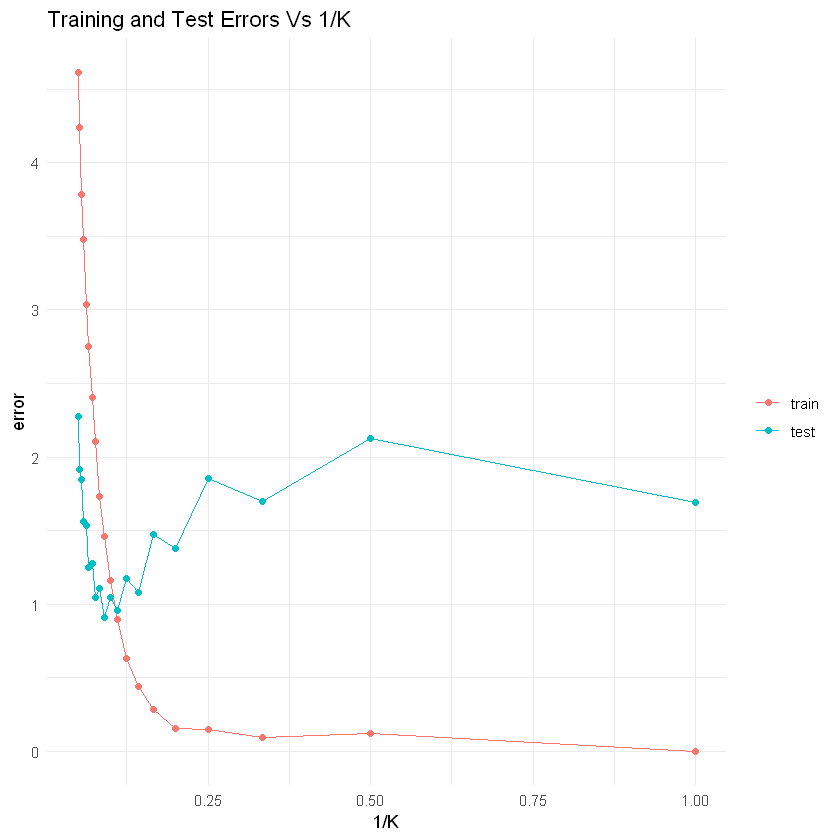

In [7]:
# plot errors for train and test data sets against 1/K

error.m <- melt(error, id='K') # reshape for visualization
names(error.m) <- c('K', 'type', 'error')
ggplot(data=error.m, aes(x=1/K, y=error, color=type)) + geom_line() + geom_point() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Training and Test Errors Vs 1/K")

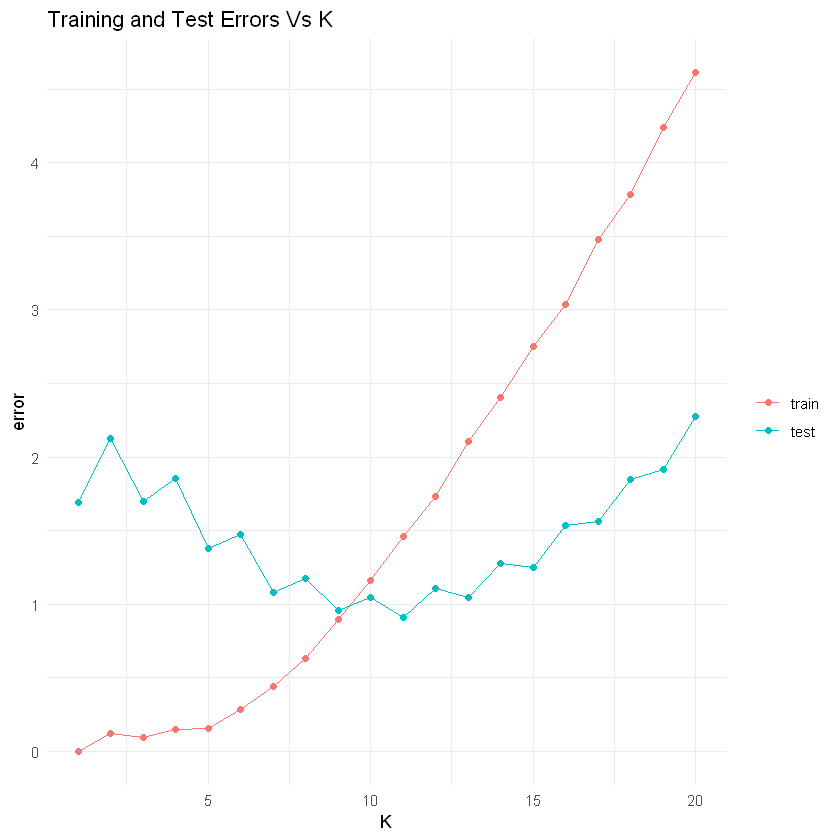

In [8]:
ggplot(data=error.m, aes(x=K, y=error, color=type)) + geom_line() + geom_point() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Training and Test Errors Vs K")

### Conclusion

The optimum value of K is the value for which the testing error is minimum. We performed KNN regressor function and to see how well our model learned from given training data we used Mean square error to interpret for what value of K our error is minimum .From the plot above or by using the min() function to find out the minimum testing error we found K=11 is optimum value.

Underfitting and Overfitting:
Overfitting occurs for the low values of 1/K or when the value of K increases. When K increases, training error also decrease and model tends to capture the noise. From the plot above, K = 1,2 overfits the data. Underfitting happens for low values of 1/K or when the training error increases as valus of K increases. From the plot above, K > 10 underfits the data.